In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Periperhal localization is consistently regulated by gene across biological replicates for MOp

In [2]:
mop_df = pd.read_csv('../../outputs/gene/Merfish_MOp_peripheral.csv')
mop_df.head()

,mouse,sample,replicate,gene,num_cells,num_annotations,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,1,1,1,1700022I11Rik,660,64,1.0,502.0,-0.227841,-103.687308,217.259859,-7.034542,1.999160e-12,3.328998e-12
1,1,1,1,1810046K07Rik,1789,75,1.0,506.0,-0.405473,-487.305865,573.424904,-20.349951,4.647409e-92,1.645640e-91
2,1,1,1,5031425F14Rik,766,69,1.0,516.5,-0.265002,-145.399285,250.607999,-9.184696,4.126896e-20,8.281178e-20
3,1,1,1,5730522E02Rik,1340,63,1.0,517.0,-0.291279,-249.100142,430.935588,-11.999628,3.568955e-33,8.327562e-33
4,1,1,1,Acta2,12831,92,2.0,386.0,0.118881,1279.663385,2784.515650,24.250512,0.000000e+00,0.000000e+00


In [3]:
#Every sample has every gene
mop_df.groupby(['mouse','sample','replicate']).size()

mouse  sample  replicate
1      1       1            252
       2       1            252
       3       1            252
       4       1            252
       5       1            252
       6       1            252
2      1       1            252
       2       1            252
       3       1            252
       4       1            252
       5       1            252
       6       1            252
dtype: int64

In [4]:
#Only 354 gene/sample pairs are not significantly peripheral/central
mop_df['bh_p'].le(0.05).value_counts()

True     2670
False     354
Name: bh_p, dtype: int64

In [5]:
#median number of cells where each gene is expressed
mop_df['num_cells'].median()

5824.5

In [9]:
#median number of annotations each gene is a part of
mop_df['num_annotations'].median()

93.0

In [10]:
n_samps = 3
tot_genes = mop_df['gene'].nunique()
sig_genes = mop_df[mop_df['bh_p'].le(0.05)].groupby('gene').filter(lambda g: len(g) > n_samps)['gene'].nunique()

print('Out of {} total genes, {} are significant in at least a {} MERFISH sample(s)'.format(
    tot_genes,sig_genes,n_samps,
))

Out of 252 total genes, 244 are significant in at least a 3 MERFISH sample(s)


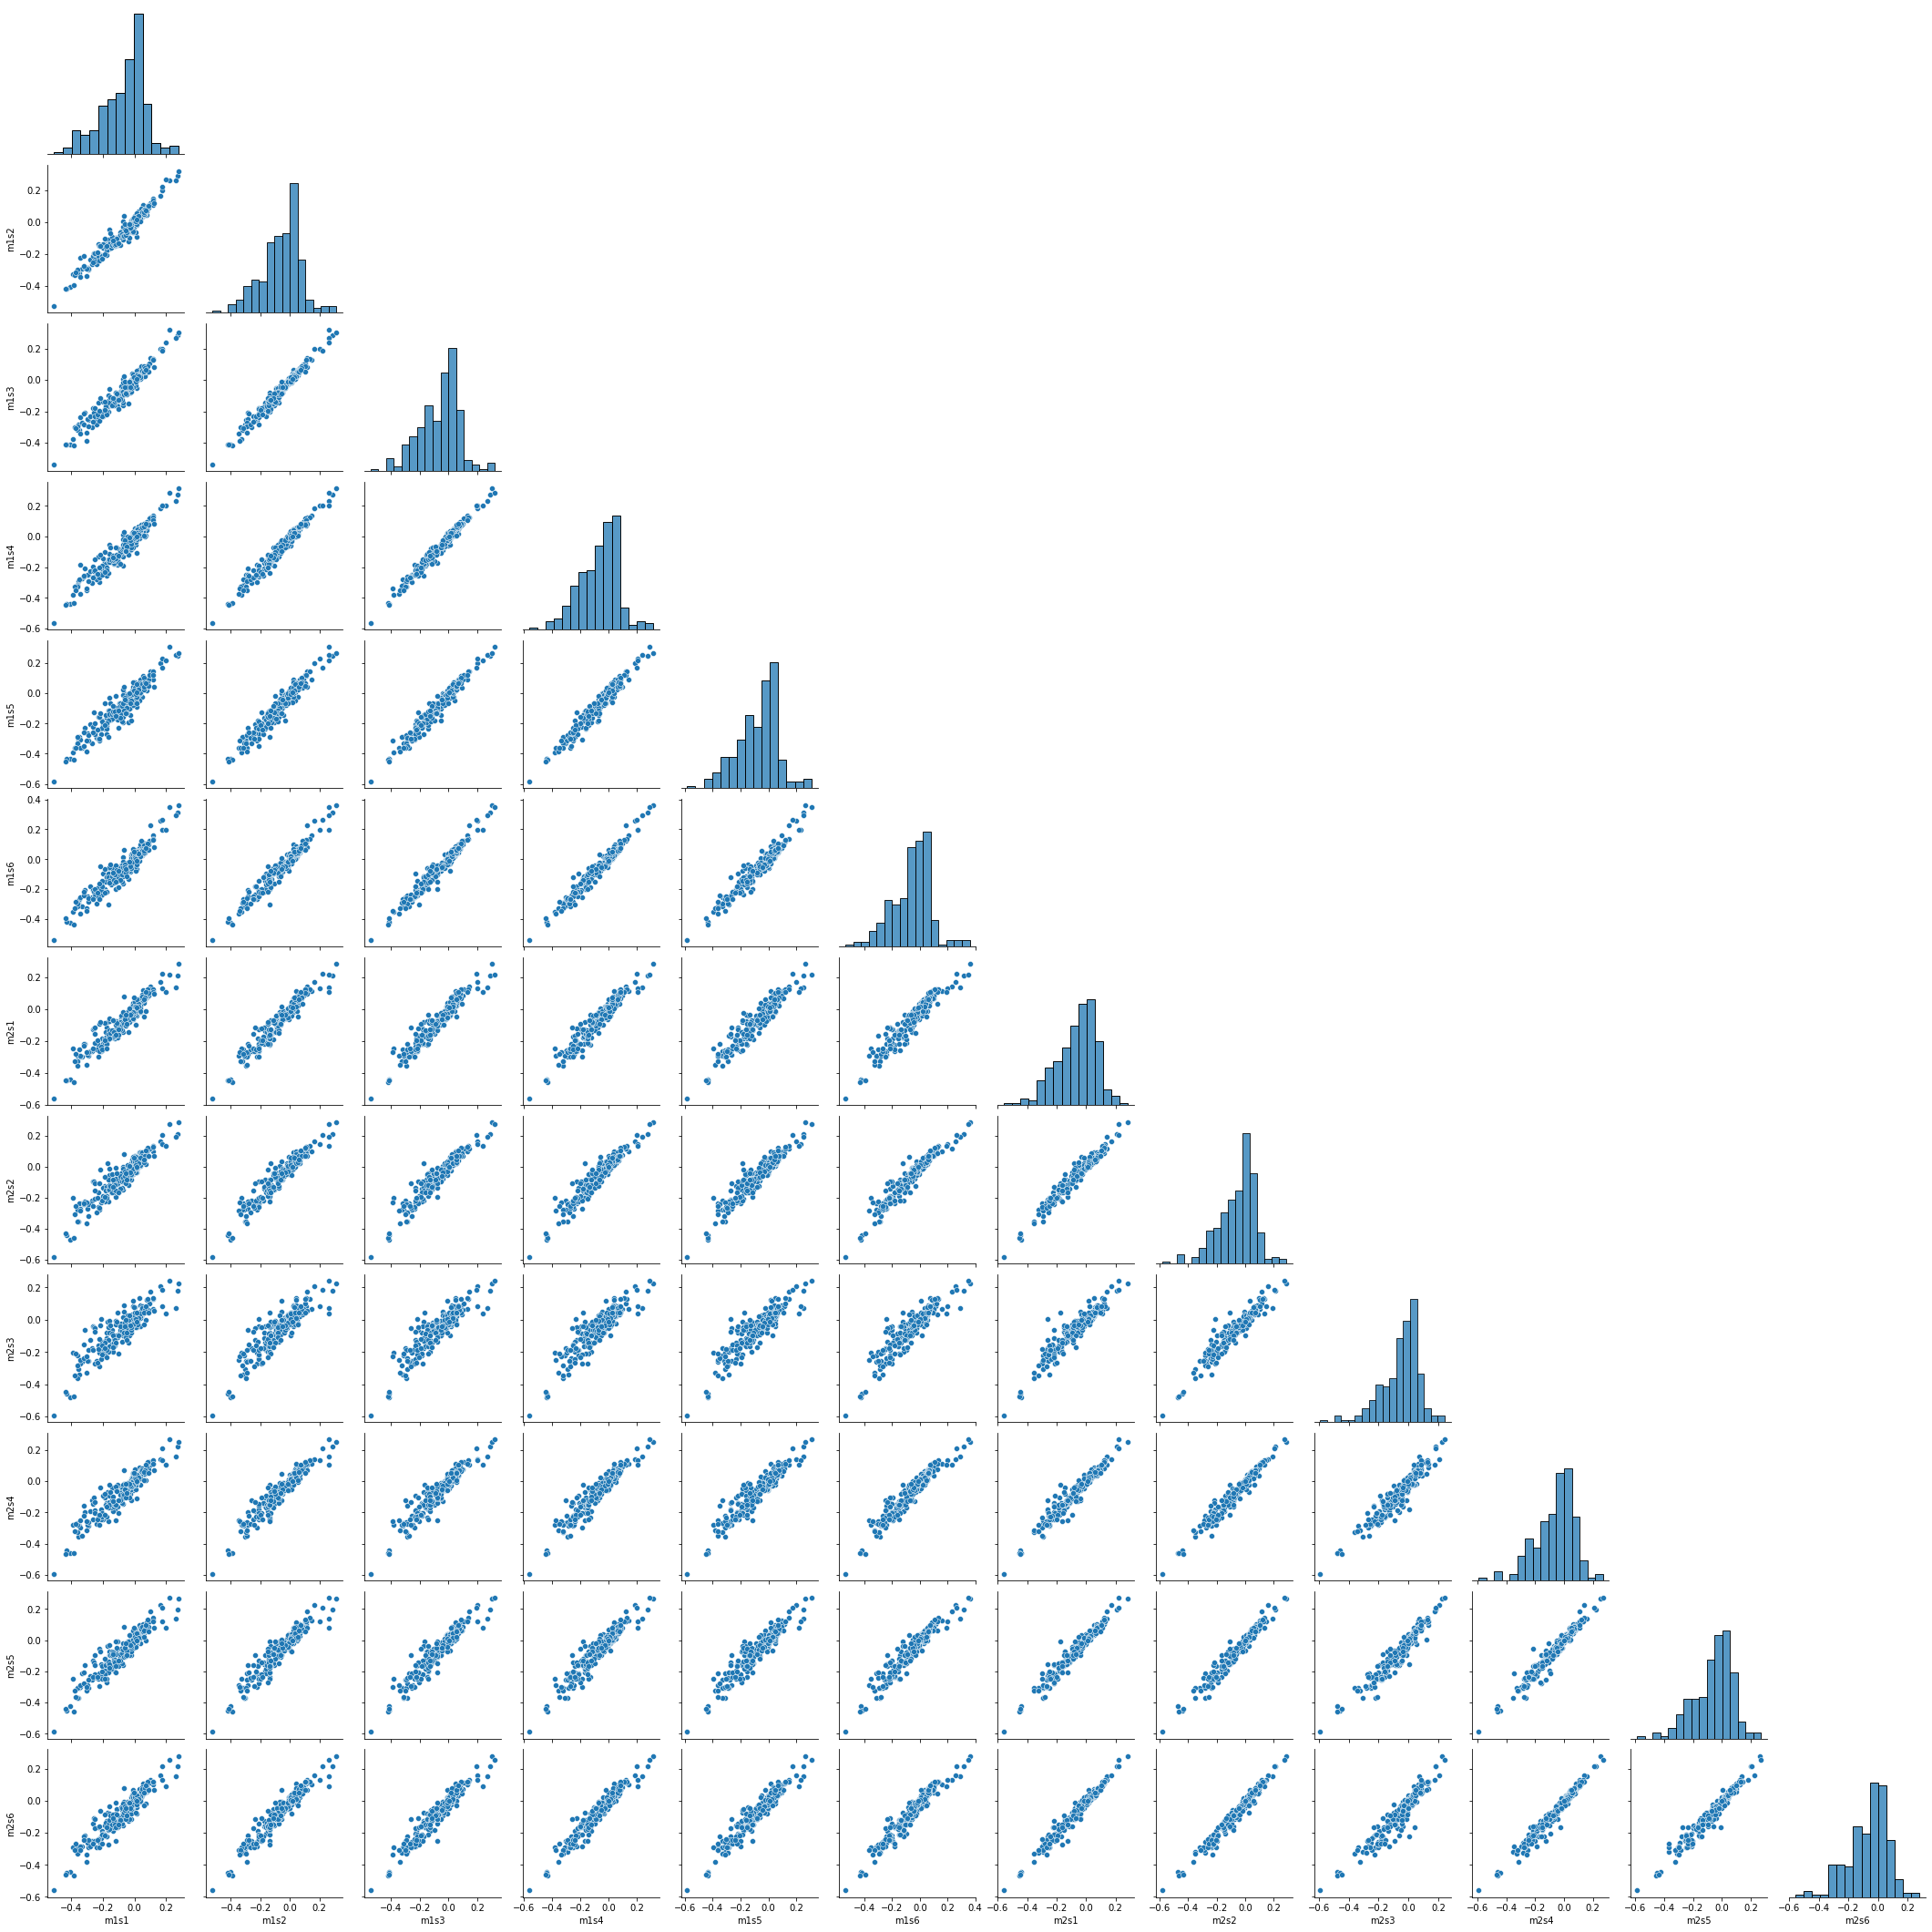

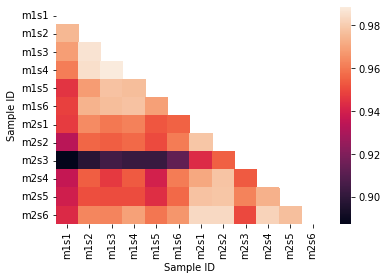

In [11]:
#Compare consistency across samples for all genes, significant or not (vast majority are significant)
mop_df['Sample ID'] = 'm'+mop_df['mouse'].astype(str)+'s'+mop_df['sample'].astype(str)

pair_df = mop_df.pivot(
    index = 'gene',
    columns = 'Sample ID',
    values = 'med_score',
)

#Make pairplot of all sample pairs
sns.pairplot(
    pair_df,
    corner=True,
)
plt.show()
plt.close()

#Make heatmap of correlation coefficients
corr_df = pair_df.corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr_df,
    mask = mask,
)
plt.show()
plt.close()

### Periperhal localization is consistently regulated by gene across biological replicates for Brainmap

In [13]:
bm_df = pd.read_csv('../../outputs/gene/Vizgen_Brainmap_peripheral.csv')
bm_df.head()

,mouse,sample,replicate,gene,num_cells,num_annotations,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,1,1,1,ADGRF3,33,18,1.0,977.0,-0.448360,-8.332306,11.022050,-2.509771,1.208096e-02,2.207222e-02
1,1,1,1,Abcc9,396,29,1.0,991.0,-0.001248,2.686529,112.534656,0.253249,8.000755e-01,8.510729e-01
2,1,1,1,Ackr1,7685,29,8.0,962.0,-0.024134,-182.420387,809.245619,-6.412586,1.430718e-10,4.579081e-10
3,1,1,1,Ackr2,1549,29,1.0,988.0,-0.010804,-16.830762,430.573076,-0.811111,4.173019e-01,5.079100e-01
4,1,1,1,Ackr3,2002,29,1.0,994.0,-0.010566,7.824388,489.774323,0.353551,7.236752e-01,7.882647e-01


In [14]:
#Every sample has every gene
bm_df.groupby(['mouse','sample','replicate']).size()

mouse  sample  replicate
1      1       1            649
               2            649
               3            649
       2       1            649
               2            649
               3            649
       3       1            649
               2            649
               3            649
dtype: int64

In [15]:
#Around half of the gene/sample pairs are not significantly peripheral/central
bm_df['bh_p'].le(0.05).value_counts()

True     3436
False    2405
Name: bh_p, dtype: int64

In [16]:
n_samps = 3
tot_genes = bm_df['gene'].nunique()
sig_genes = bm_df[bm_df['bh_p'].le(0.05)].groupby('gene').filter(lambda g: len(g) > n_samps)['gene'].nunique()

print('Out of {} total genes, {} are significant in at least a {} MERFISH sample(s)'.format(
    tot_genes,sig_genes,n_samps,
))

Out of 649 total genes, 411 are significant in at least a 3 MERFISH sample(s)


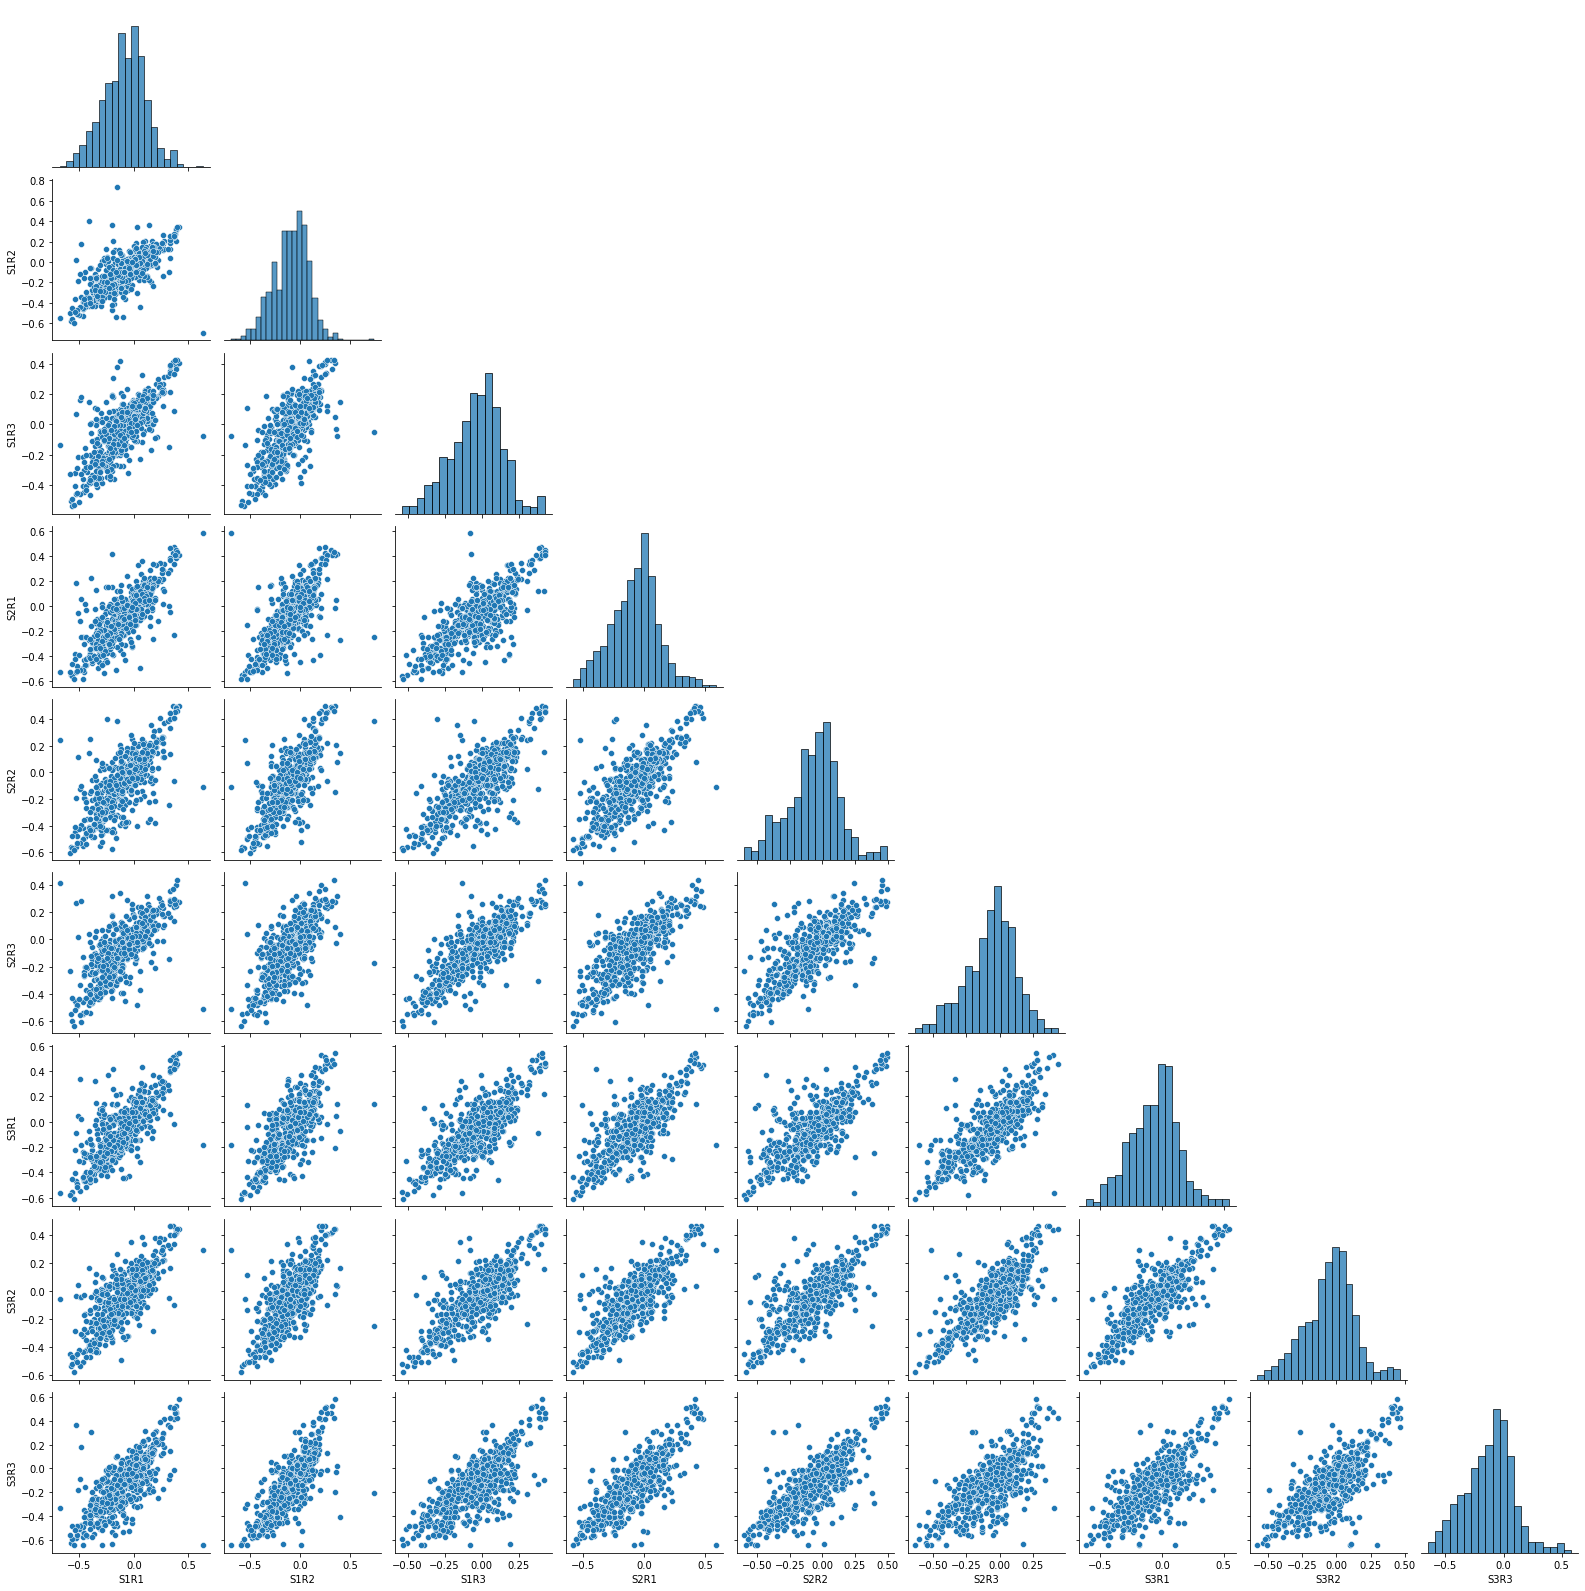

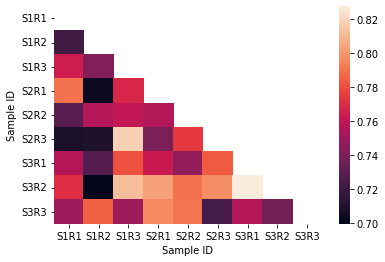

In [17]:
#Compare consistency across samples for all genes, significant or not
bm_df['Sample ID'] = 'S'+bm_df['sample'].astype(str)+'R'+bm_df['replicate'].astype(str)

pair_df = bm_df.pivot(
    index = 'gene',
    columns = 'Sample ID',
    values = 'med_score',
)

#Make pairplot of all sample pairs
sns.pairplot(
    pair_df,
    corner=True,
)
plt.show()
plt.close()

#Make heatmap of correlation coefficients
corr_df = pair_df.corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr_df,
    mask = mask,
)
plt.show()
plt.close()

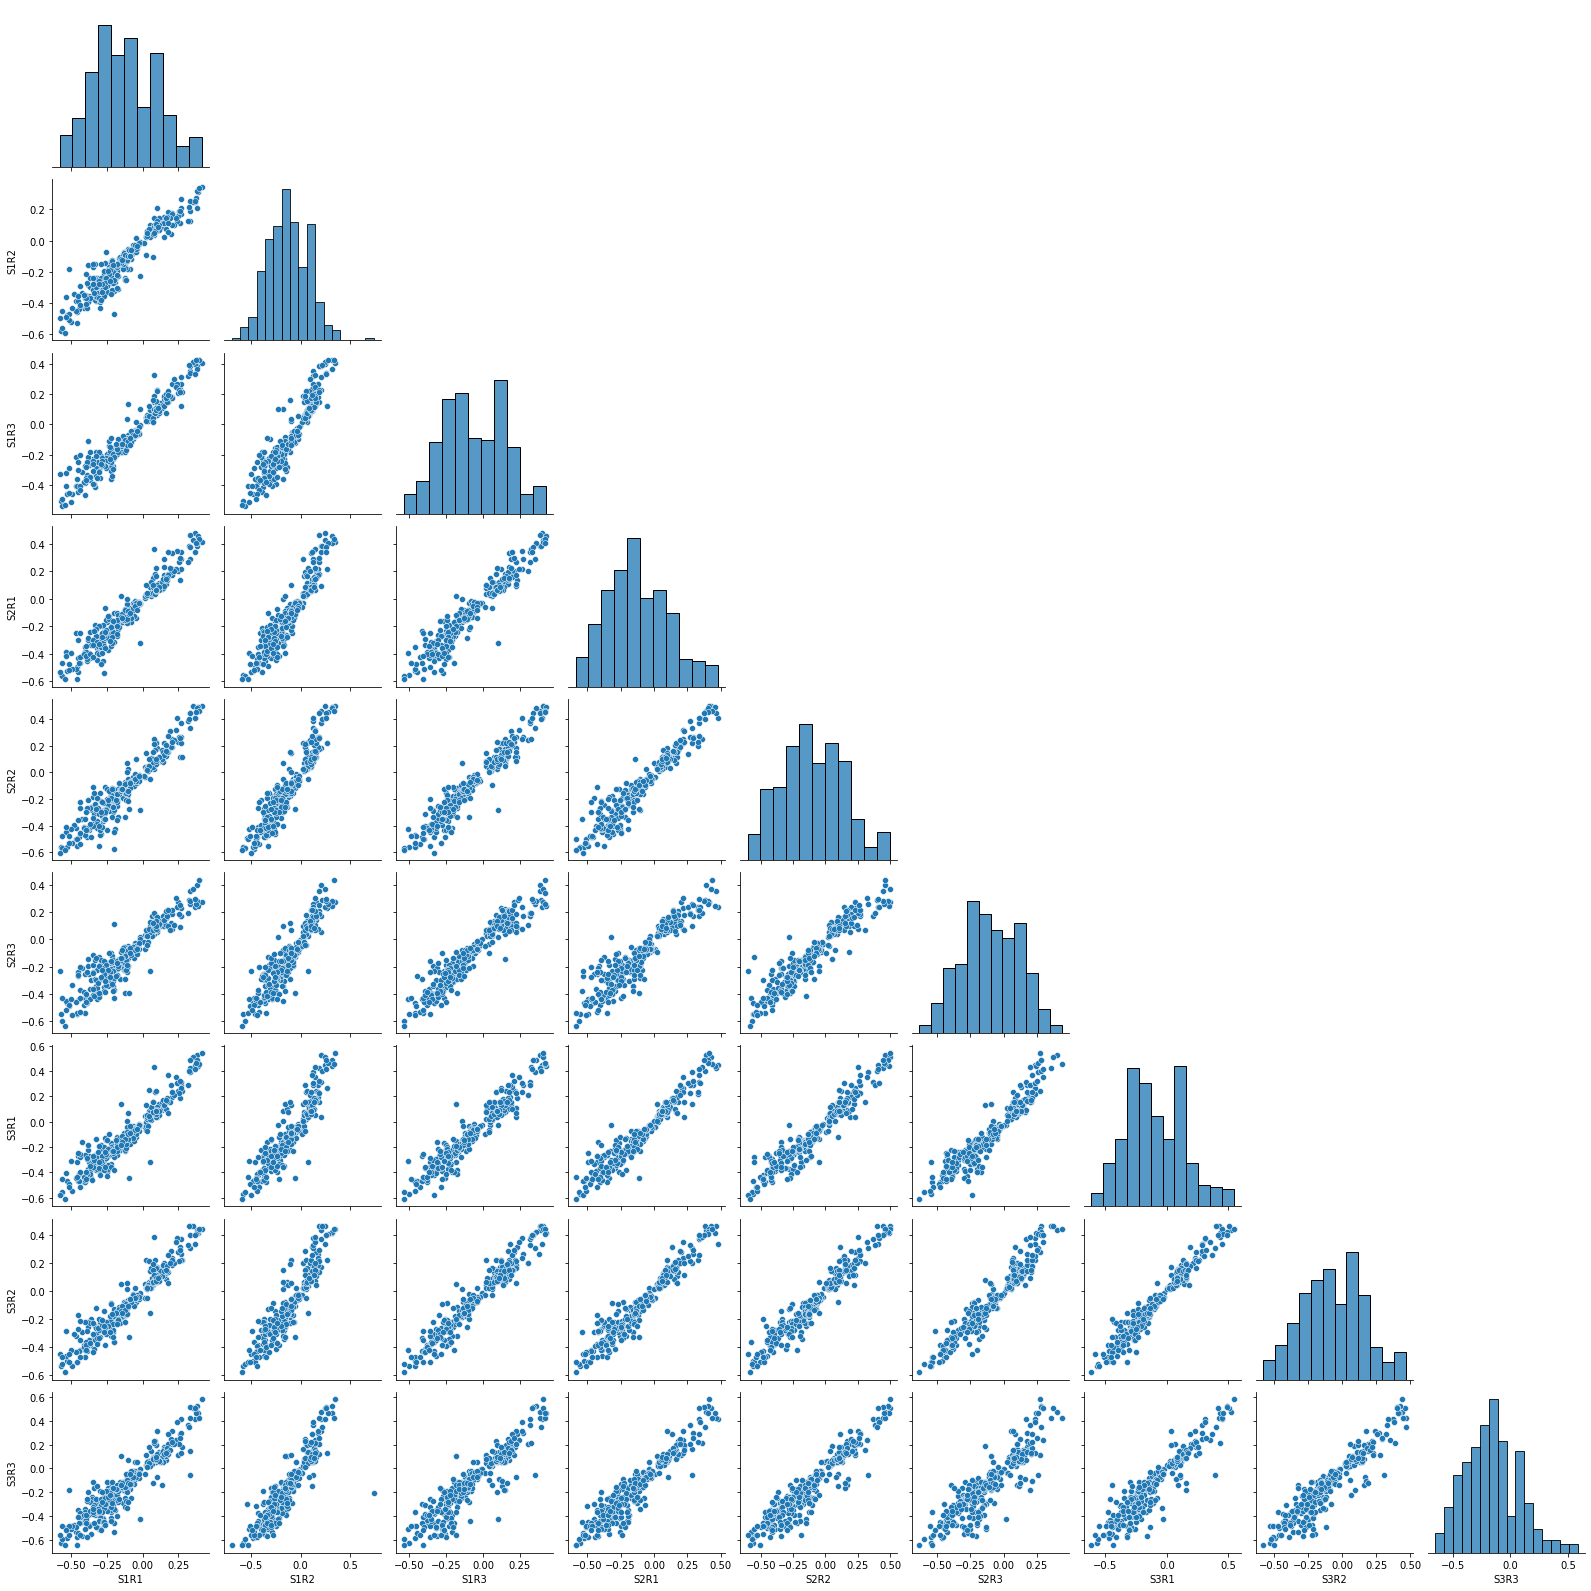

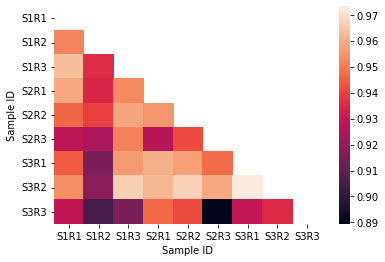

In [18]:
#Compare consistency across samples for significant genes only
bm_df['Sample ID'] = 'S'+bm_df['sample'].astype(str)+'R'+bm_df['replicate'].astype(str)

pair_df = bm_df[bm_df['bh_p'].le(0.05)].pivot(
    index = 'gene',
    columns = 'Sample ID',
    values = 'med_score',
)

#Make pairplot of all sample pairs
sns.pairplot(
    pair_df,
    corner=True,
)
plt.show()
plt.close()

#Make heatmap of correlation coefficients
corr_df = pair_df.corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr_df,
    mask = mask,
)
plt.show()
plt.close()

In [19]:
bm_df['gene'].nunique()

649

In [20]:
bm_df['num_annotations'].median()

32.0